# - Pass Data -

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns
from PIL import Image
import matplotlib.patches as mpatches
# from pywaffle import Waffle
import math

In [2]:
team = 'juventus'

df = pd.read_csv(f'/work/assets/{team}/{team}_ptype.csv')
df2 = pd.read_csv(f'/work/assets/{team}/{team}_pass.csv')

df = df.rename(columns={'player':'Player'})
df_pass = df2.merge(df, how='outer', on='Player')


In [3]:
img = Image.open(f'/work/assets/image/{team}.png').convert('L')
logo = img.copy()
logo.putalpha(70)

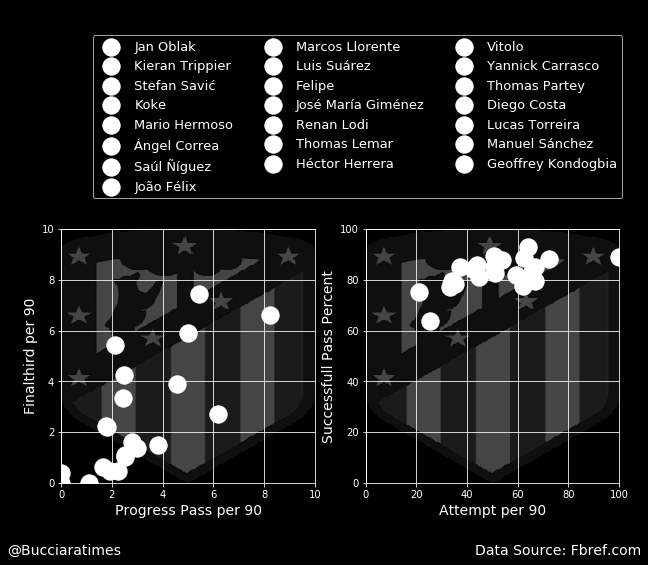

In [8]:
# plt.style.use('dark_background')
              
colors = ['white', 'tomato', 'dodgerblue', 'gold' ,'green', 'violet', 'darkviolet']
pickup_player = ['Frenkie de Jong', 'Lionel Messi','Ousmane Dembélé','Antoine Griezmann','Philippe Coutinho','Pedri']

standard = 5
plt_size = 300
xrange = 10
yrange = 10
xrange2 = 100
yrange2 = 100

Xtheme = 'Progcount'
Ytheme = 'Finalthird'
Xtheme2 = 'Attempt'
Ytheme2 = 'Sucpct'

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

axes[0].imshow(logo,extent=[0,xrange, 0,yrange])
axes[1].imshow(logo,extent=[0,xrange2, 0,yrange2])

axes[0].grid(True)
axes[1].grid(True)



for i in range(df.shape[0]):
 
    axes[0].scatter(
        df_pass[Xtheme][i] / df_pass['Minute90'][i],
        df_pass[Ytheme][i] / df_pass['Minute90'][i],
        alpha=1,
        s=plt_size,
        color=colors[0],
        label=[name for name in df_pass['Player']][i])

    axes[1].scatter(
        df_pass[Xtheme2][i] / df_pass['Minute90'][i],
        df_pass[Ytheme2][i],
        alpha=1,
        s=plt_size,
        color=colors[0])


#     axes[0].scatter(
#         df_pass[Xtheme][i] / df_pass['Minute90'][i],
#         df_pass[Ytheme][i] / df_pass['Minute90'][i],
#         alpha=0.3,
#         s=plt_size,
#         color=colors[0])
#     axes[1].scatter(
#         df_pass[Xtheme2][i] / df_pass['Minute90'][i],
#         df_pass[Ytheme2][i],
#         alpha=0.3,
#         s=plt_size,
#         color=colors[0],
#         label=[name for name in df_pass['Player']][i])

axes[0].set_xlim(0, xrange)
axes[0].set_ylim(0, yrange)
axes[1].set_xlim(0, xrange2)
axes[1].set_ylim(0, yrange2)
axes[0].set_xlabel('Progress ' + 'Pass per 90', fontsize=14)
axes[0].set_ylabel(str(Ytheme) + ' ' + 'per 90', fontsize=14)
axes[1].set_xlabel(Xtheme2 + ' ' + 'per 90', fontsize=14)
axes[1].set_ylabel('Successfull Pass Percent', fontsize=14)

plt.gcf().text(0.05,-0.05,"@Bucciaratimes",fontsize=14)
# plt.text(-120,-25, '@Bucciaratimes', color='white',fontsize=12,alpha=0.7)
plt.gcf().text(0.7,-0.05,"Data Source: Fbref.com",fontsize=14)

fig.legend(bbox_to_anchor=(0.12,1),loc=3, fontsize=13, ncol=3)
# fig.savefig(f'/work/output/{team}/pickup_oam_player_pass1.png',bbox_inches='tight')

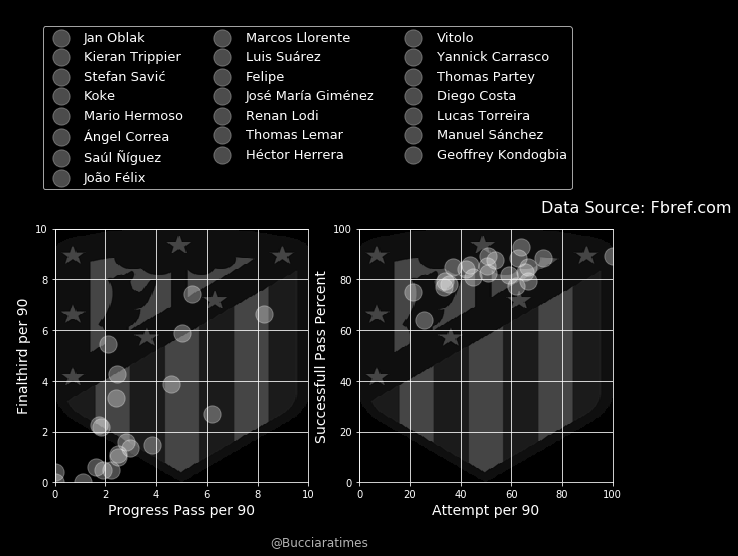

In [5]:
team = 'atletico-madrid'

df = pd.read_csv(f'/work/assets/{team}/{team}_ptype.csv')
df2 = pd.read_csv(f'/work/assets/{team}/{team}_pass.csv')

df = df.rename(columns={'player':'Player'})
df_pass = df2.merge(df, how='outer', on='Player')

img = Image.open(f'/work/assets/image/{team}.png').convert('L')
logo = img.copy()
logo.putalpha(70)


plt.style.use('dark_background')
              
colors = ['white', 'tomato', 'dodgerblue', 'gold' ,'green', 'violet', 'darkviolet']
pickup_player = ['Frenkie de Jong', 'Lionel Messi','Ousmane Dembélé','Antoine Griezmann','Philippe Coutinho','Pedri']

standard = 5
plt_size = 300
xrange = 10
yrange = 10
xrange2 = 100
yrange2 = 100

Xtheme = 'Progcount'
Ytheme = 'Finalthird'
Xtheme2 = 'Attempt'
Ytheme2 = 'Sucpct'

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

axes[0].imshow(logo,extent=[0,xrange, 0,yrange])
axes[1].imshow(logo,extent=[0,xrange2, 0,yrange2])

axes[0].grid(True)
axes[1].grid(True)



for i in range(df.shape[0]):

    if ([key for key in df_pass['Finalthird']][i] / [min_ for min_ in df_pass['Minute90']][i] > standard)and([success for success in df_pass['Sucpct']][i] > 90):
        
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] / df_pass['Minute90'][i],
            alpha=1,
            s=plt_size,
            color=colors[5],
            label=[name for name in df_pass['Player']][i])
        
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i],
            alpha=1,
            s=plt_size,
            color=colors[5])

    else:
        axes[0].scatter(
            df_pass[Xtheme][i] / df_pass['Minute90'][i],
            df_pass[Ytheme][i] / df_pass['Minute90'][i],
            alpha=0.3,
            s=plt_size,
            color=colors[0])
        axes[1].scatter(
            df_pass[Xtheme2][i] / df_pass['Minute90'][i],
            df_pass[Ytheme2][i],
            alpha=0.3,
            s=plt_size,
            color=colors[0],
            label=[name for name in df_pass['Player']][i])

axes[0].set_xlim(0, xrange)
axes[0].set_ylim(0, yrange)
axes[1].set_xlim(0, xrange2)
axes[1].set_ylim(0, yrange2)
axes[0].set_xlabel('Progress ' + 'Pass per 90', fontsize=14)
axes[0].set_ylabel(str(Ytheme) + ' ' + 'per 90', fontsize=14)
axes[1].set_xlabel(Xtheme2 + ' ' + 'per 90', fontsize=14)
axes[1].set_ylabel('Successfull Pass Percent', fontsize=14)

# plt.gcf().text(0,-0.05,"@Bucciaratimes")
plt.text(-35,-25, '@Bucciaratimes', color='white',fontsize=12,alpha=0.7)
plt.gcf().text(0.8,0.90,"Data Source: Fbref.com",fontsize=16)

fig.legend(bbox_to_anchor=(0.05,1),loc=3, fontsize=13, ncol=3)
# fig.savefig(f'/work/output/{team}/pickup_oam_player_pass1.png',bbox_inches='tight')
